In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import math
import torch
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from torch import nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from neuralprophet import NeuralProphet
sns.set_theme(style="whitegrid")
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


c:\Users\alex\AppData\Local\Programs\Python\Python310\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [23]:
stock_data = yf.download('2330.TW',start='2016-01-01',end='2022-12-01')
stock_data_close = stock_data[['Close']]
stock_data_close = stock_data_close.rename_axis('ds').reset_index()
stock_data_close.columns = ['ds','y']
print(stock_data_close.head(),"\nshape:",stock_data_close.shape)

[*********************100%***********************]  1 of 1 completed
          ds      y
0 2016-01-04  139.5
1 2016-01-05  138.0
2 2016-01-06  135.5
3 2016-01-07  133.0
4 2016-01-08  134.0 
shape: (1685, 2)


In [24]:
m = NeuralProphet()
metrics = m.fit(stock_data_close)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.499% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 166


  0%|          | 0/131 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E-01, min: 3.00E+00


  0%|          | 0/131 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.24E-01, min: 1.15E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.09E-01
Epoch[166/166]: 100%|██████████| 166/166 [00:19<00:00,  8.42it/s, SmoothL1Loss=0.00168, MAE=19.6, RMSE=27.4, Loss=0.00151, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.499% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.499% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


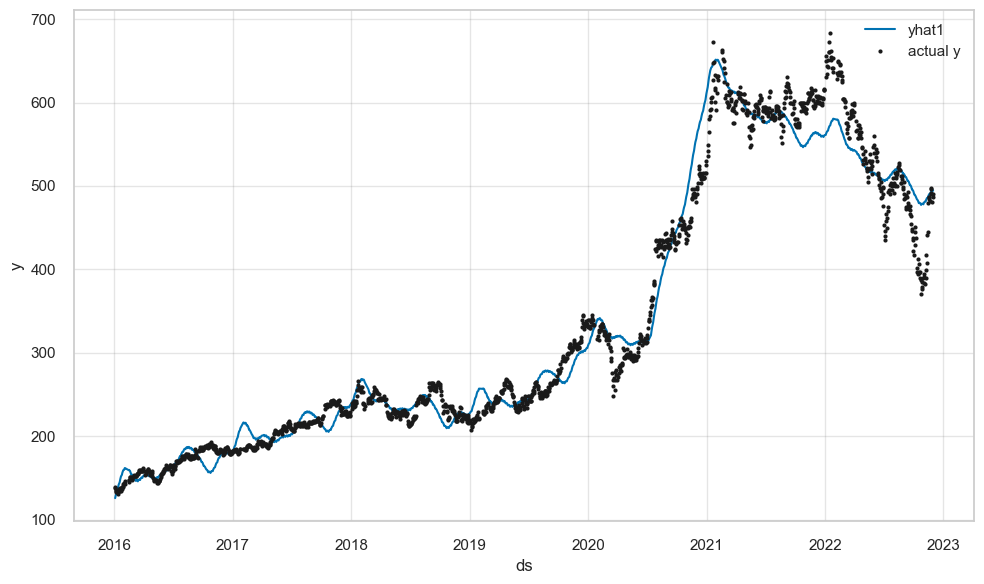

In [27]:
forecast = m.predict(stock_data_close)
df_fc = m.get_latest_forecast(forecast)
print(df_fc).head())
forecasts_plot = m.plot(forecast)